In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
import pywt
import numpy as np
import scipy.io.wavfile as wav

# Load audio file
rate, signal = wav.read('og.wav')

# Define wavelet function and level of decomposition
wavelet = 'db4'
level = 1

# Define low and high frequency ranges
low_freq_range = (0, np.pi/2)
high_freq_range = (np.pi/2, np.pi)

# Extract wavelet coefficients
coeffs = pywt.wavedec(signal, wavelet, level=level)

# Threshold coefficients to extract desired frequency ranges
cA_filtered = pywt.threshold(coeffs[0], low_freq_range[1], mode='less')
cD_filtered = pywt.threshold(coeffs[1], high_freq_range[0], mode='greater')
# cD4_filtered = pywt.threshold(coeffs[2], high_freq_range[0], mode='greater')
# cD3_filtered = pywt.threshold(coeffs[3], high_freq_range[0], mode='greater')
# cD2_filtered = pywt.threshold(coeffs[4], high_freq_range[0], mode='greater')
# cD1_filtered = pywt.threshold(coeffs[5], high_freq_range[0], mode='greater')

print(cA_filtered)

# Reconstruct filtered signals
low_freq = pywt.waverec([cA_filtered, None], wavelet)
high_freq = pywt.waverec([None, cD_filtered], wavelet)

# Normalize output signals
low_freq /= np.max(np.abs(low_freq))
high_freq /= np.max(np.abs(high_freq))

# Save output signals as separate audio files
wav.write('low_freq.wav', rate, low_freq)
wav.write('high_freq.wav', rate, high_freq)

[-4697.42729549     0.         -7917.70580394 ...     0.
     0.         -1052.1917104 ]


In [16]:
import pywt
import numpy as np
import scipy.io.wavfile as wav

# Load audio file
rate, signal = wav.read('og.wav')

# Define wavelet function and level of decomposition
wavelet = 'db4'
level = 1
for i in range(1,4):


    # Define low and high frequency ranges
    low_freq_range = (0, np.pi/(2**i))
    high_freq_range = (np.pi/(2**i), np.pi/(2**(i-1)))

    # Extract wavelet coefficients
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Threshold coefficients to extract desired frequency ranges
    cA_filtered = pywt.threshold(coeffs[0], low_freq_range[1], mode='less')
    cD_filtered = pywt.threshold(coeffs[1], high_freq_range[0], mode='greater')
    # cD4_filtered = pywt.threshold(coeffs[2], high_freq_range[0], mode='greater')
    # cD3_filtered = pywt.threshold(coeffs[3], high_freq_range[0], mode='greater')
    # cD2_filtered = pywt.threshold(coeffs[4], high_freq_range[0], mode='greater')
    # cD1_filtered = pywt.threshold(coeffs[5], high_freq_range[0], mode='greater')

    print(cA_filtered)

    # Reconstruct filtered signals
    low_freq = pywt.waverec([cA_filtered, None], wavelet)
    high_freq = pywt.waverec([None, cD_filtered], wavelet)

    # Normalize output signals
    low_freq /= np.max(np.abs(low_freq))
    high_freq /= np.max(np.abs(high_freq))

    # Save output signals as separate audio files
    wav.write(f'low_freq_{i}.wav', rate, low_freq)
    wav.write(f'high_freq_{i}.wav', rate, high_freq)

    rate, signal = wav.read(f'low_freq_{i}.wav')

[-4697.42729549     0.         -7917.70580394 ...     0.
     0.         -1052.1917104 ]
[-1.42339293e-01  1.33052833e-02 -2.28661967e-01 ...  5.74702843e-05
 -3.56439188e-04 -3.15711107e-02]
[-1.41112421e-01  9.48275494e-03 -2.16920494e-01 ...  1.15471271e-04
 -7.18032626e-04 -3.04734480e-02]


/tmp/ipykernel_7115/980168837.py:37: RuntimeWarning: invalid value encountered in divide
  high_freq /= np.max(np.abs(high_freq))


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [18]:
# Read in two audio files
file1 = 'low_freq_2.wav'
file2 = 'low_freq_3.wav'
# file2 = 'high_freq.wav'
signal1, sr1 = sf.read(file1)
signal2, sr2 = sf.read(file2)

In [19]:
# Reshape signal2 to match signal1 shape
signal2 = signal2.reshape(-1)

# Pad the shorter signal with zeros to the length of the longer one
if len(signal1) > len(signal2):
    signal2 = np.pad(signal2, (0, len(signal1) - len(signal2)))
else:
    signal1 = np.pad(signal1, (0, len(signal2) - len(signal1)))


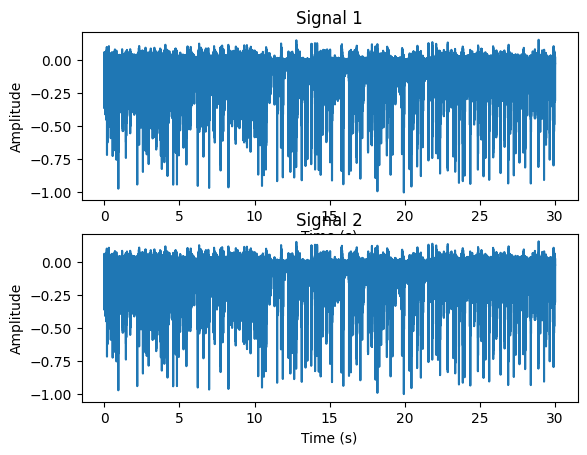

RMS Error: 1.0524059265769814e-05


In [20]:
# Compute the RMS error between the two signals
error = np.sqrt(np.mean((signal1 - signal2)**2))

# Display a plot comparing the two signals
t1 = np.arange(0, len(signal1)/sr1, 1/sr1)
t2 = np.arange(0, len(signal2)/sr2, 1/sr2)
plt.subplot(2, 1, 1)
plt.plot(t1, signal1)
plt.title('Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(t2, signal2)
plt.title('Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Print the RMS error
print('RMS Error:', error)

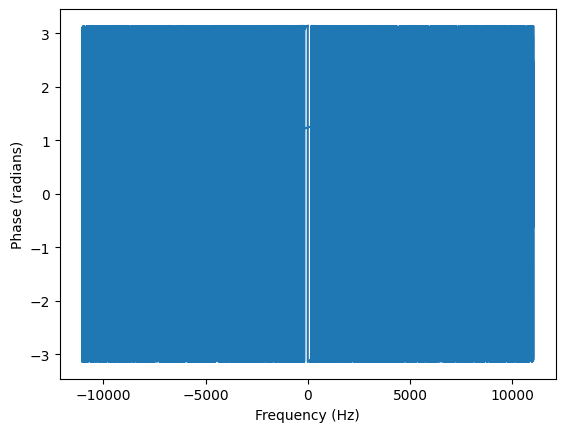

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

# Load audio file
rate, signal = wav.read('high_freq_1.wav')

# Perform FFT
fft_signal = np.fft.fft(signal)

# Calculate phase spectrum
phase_spectrum = np.angle(fft_signal)

# Plot phase spectrum
freqs = np.fft.fftfreq(len(signal), d=1/rate)
plt.plot(freqs, phase_spectrum)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.show()
